In [13]:
import os
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm
import numpy as np
from io import BytesIO
from PIL import Image

radar_img_path = "/data2/itri/DCV/single_sensor_data/bag1/radar_cart_0_200_timelapsed"
bbox_npy_path = "/data2/itri/DCV/single_sensor_data/bag1/baraja_velodyne_detection_box_npy"

img_out_path = '/home/ee904/NCTU/research/itri_related/20201007/code/gen_anno/check_npz_directly'

lidar = os.listdir(bbox_npy_path)
lidar.sort()

radar = os.listdir(radar_img_path)
radar.sort()

  0%|          | 0/9146 [00:00<?, ?it/s]

i: 1126
lf: 16020634426649.npz
radar[i] 16020634426649.png
path:  /data2/itri/DCV/single_sensor_data/bag1/radar_cart_0_200_timelapsed/16020634426649.png


 12%|█▏        | 1126/9146 [00:00<00:02, 2684.67it/s]


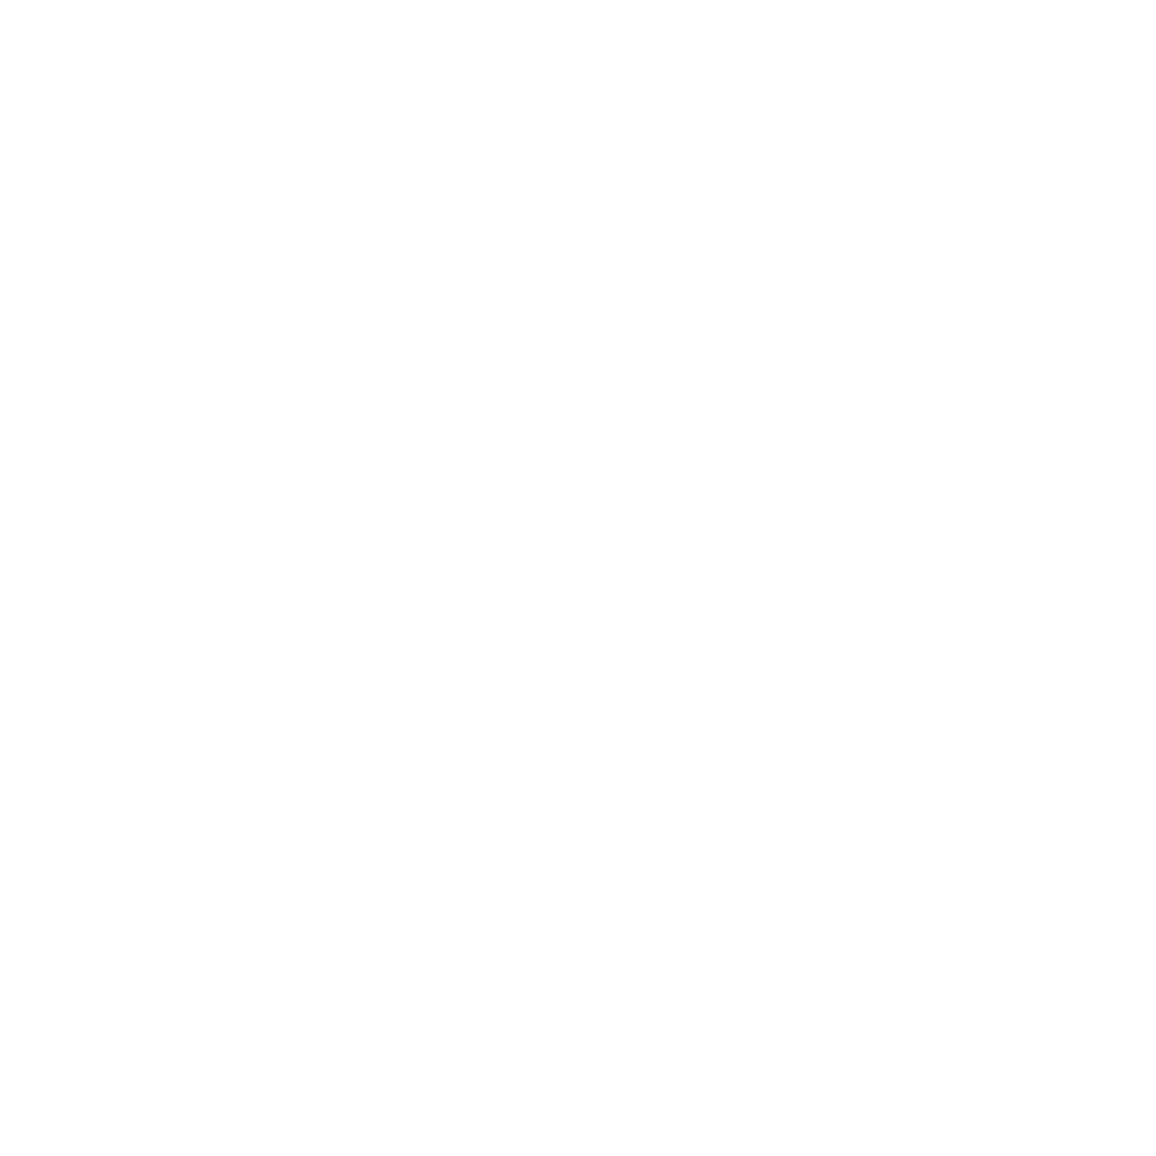

In [15]:
for i, lf in enumerate(tqdm(lidar[:])):
	if i != 1126:
		continue

	print('i:', i)
	print('lf:', lf)
	print('radar[i]', radar[i])

	data = np.load(os.path.join(
		bbox_npy_path,
		lf
	))

	obj_list = data['bbox']

	boundary = 0.175*1142/2
	for ii in range(len(obj_list)):
		obj = obj_list[ii]
		x = -obj[:, 1]-0.03
		y = obj[:, 0]+0.6
		plt.plot(x, y, color='white')

	path = os.path.join(radar_img_path, radar[i])
	radar_img = cv2.imread(path)
	print('path: ', path)
	# print('radar_img: ', radar_img)
	# print('path: ', os.path.join(radar_img_path, radar[i]))

	fig = plt.gcf()
	DPI = fig.get_dpi()
	fig.set_size_inches(1142.0/float(DPI), 1142.0/float(DPI))
	plt.xlim(-boundary,boundary)
	plt.ylim(0,boundary*2)
	plt.gca().set_aspect('equal', adjustable='box')
	plt.axis('off')

	plt.subplots_adjust(left=0, bottom=0, right=1,
											top=1, wspace=0, hspace=0)
	
	buffer_ = BytesIO()
	plt.savefig(buffer_, format="PNG", bbox_inches='tight',
							pad_inches=0, transparent=True)
	buffer_.seek(0)

	lidar_anno = Image.open(buffer_)
	radar_img = Image.fromarray(radar_img[:, :, ::-1])
	final = radar_img.convert('RGBA')
	final = Image.alpha_composite(final, lidar_anno)
	final.save(
			'{}/{}.png'.format(img_out_path, radar[i][:-4]))
	
	break


